# Linear Regression

## Load Dataset from sklearn

In [1]:
!pip install matplotlib seaborn pandas sklearn

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1304 sha256=3aca3f5de6283f21d23795224a9d7f5e3021e78c17c6b01273d25f7547d6bc28
  Stored in directory: c:\users\0108s\appdata\local\pip\cache\wheels\22\0b\40\fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_boston
boston = load_boston()

print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

C:\Users\0108s\miniforge3\envs\pytorch\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hous

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)
df["TARGET"] = boston.target
df.tail()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
505,0.04741,0.0,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0,396.90,7.88,11.9


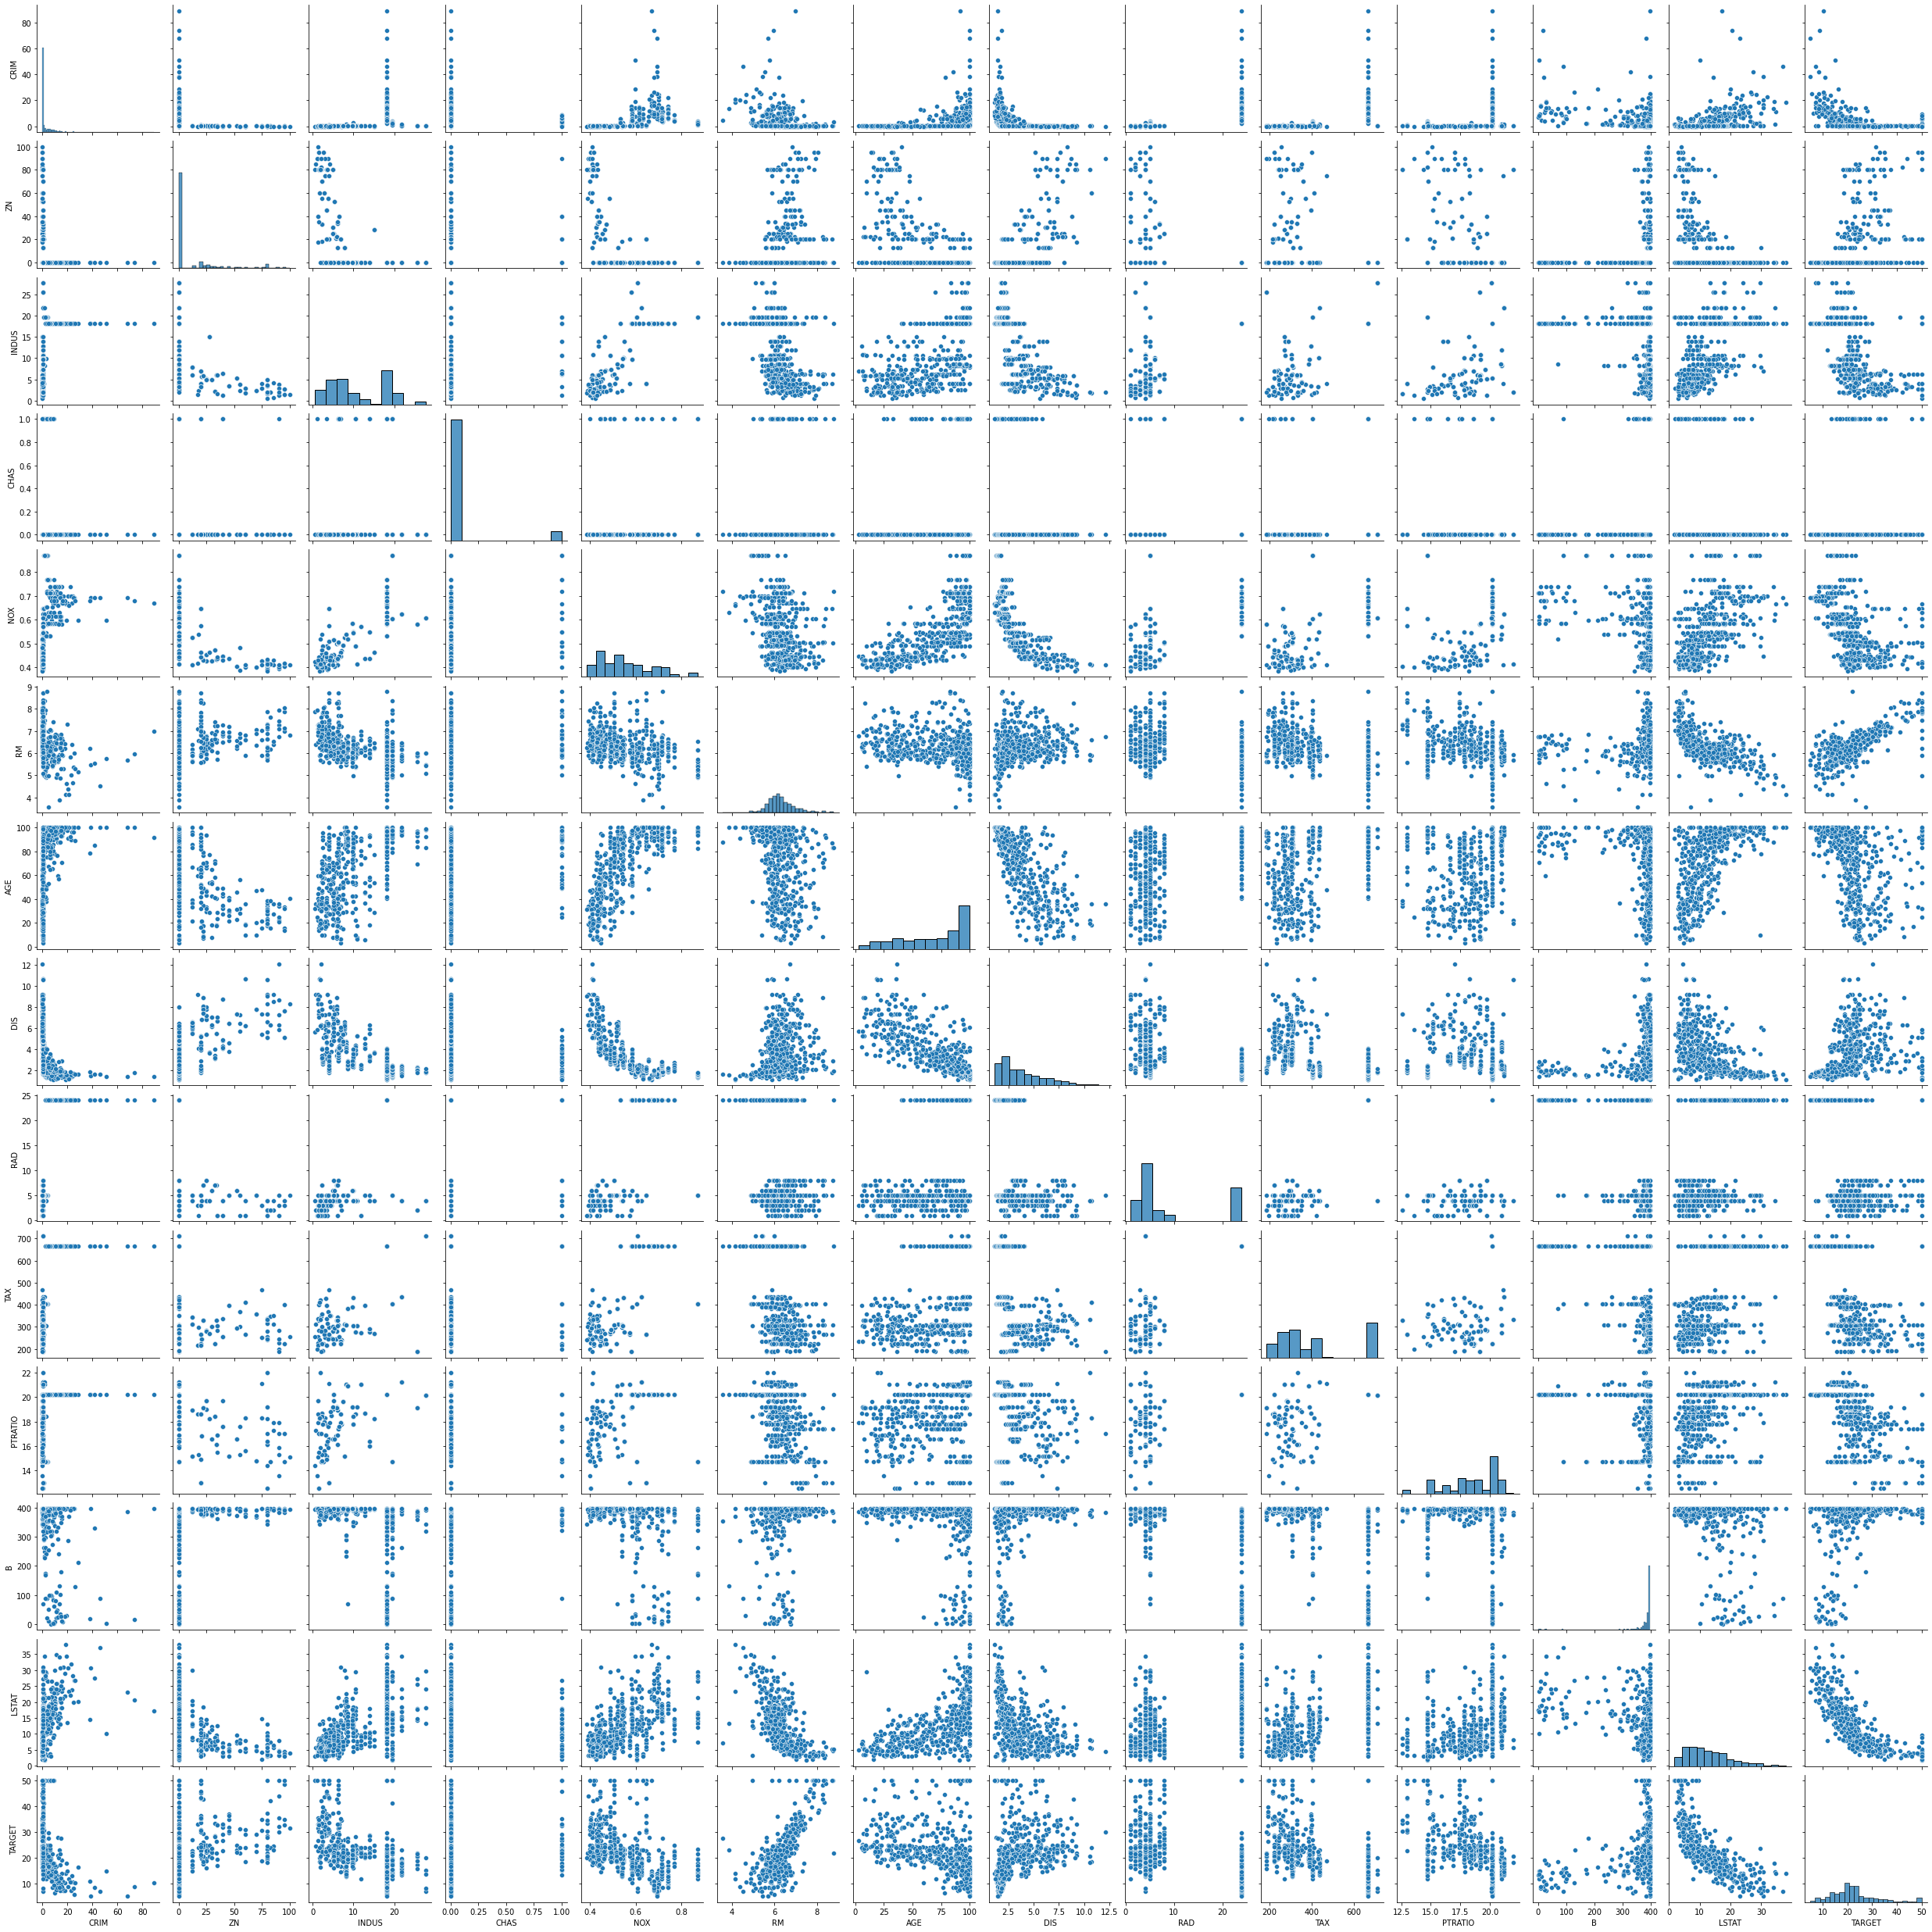

In [5]:
sns.pairplot(df)
plt.show()

In [6]:
cols = ["TARGET", "INDUS", "RM", "LSTAT", "NOX", "DIS"]

In [7]:
df[cols].describe()

,TARGET,INDUS,RM,LSTAT,NOX,DIS
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.532806,11.136779,6.284634,12.653063,0.554695,3.795043
std,9.197104,6.860353,0.702617,7.141062,0.115878,2.105710
min,5.000000,0.460000,3.561000,1.730000,0.385000,1.129600
25%,17.025000,5.190000,5.885500,6.950000,0.449000,2.100175
50%,21.200000,9.690000,6.208500,11.360000,0.538000,3.207450
75%,25.000000,18.100000,6.623500,16.955000,0.624000,5.188425
max,50.000000,27.740000,8.780000,37.970000,0.871000,12.126500


In [12]:
df[cols].head()

,TARGET,INDUS,RM,LSTAT,NOX,DIS
0,24.0,2.31,6.575,4.98,0.538,4.0900
1,21.6,7.07,6.421,9.14,0.469,4.9671
2,34.7,7.07,7.185,4.03,0.469,4.9671
3,33.4,2.18,6.998,2.94,0.458,6.0622
4,36.2,2.18,7.147,5.33,0.458,6.0622


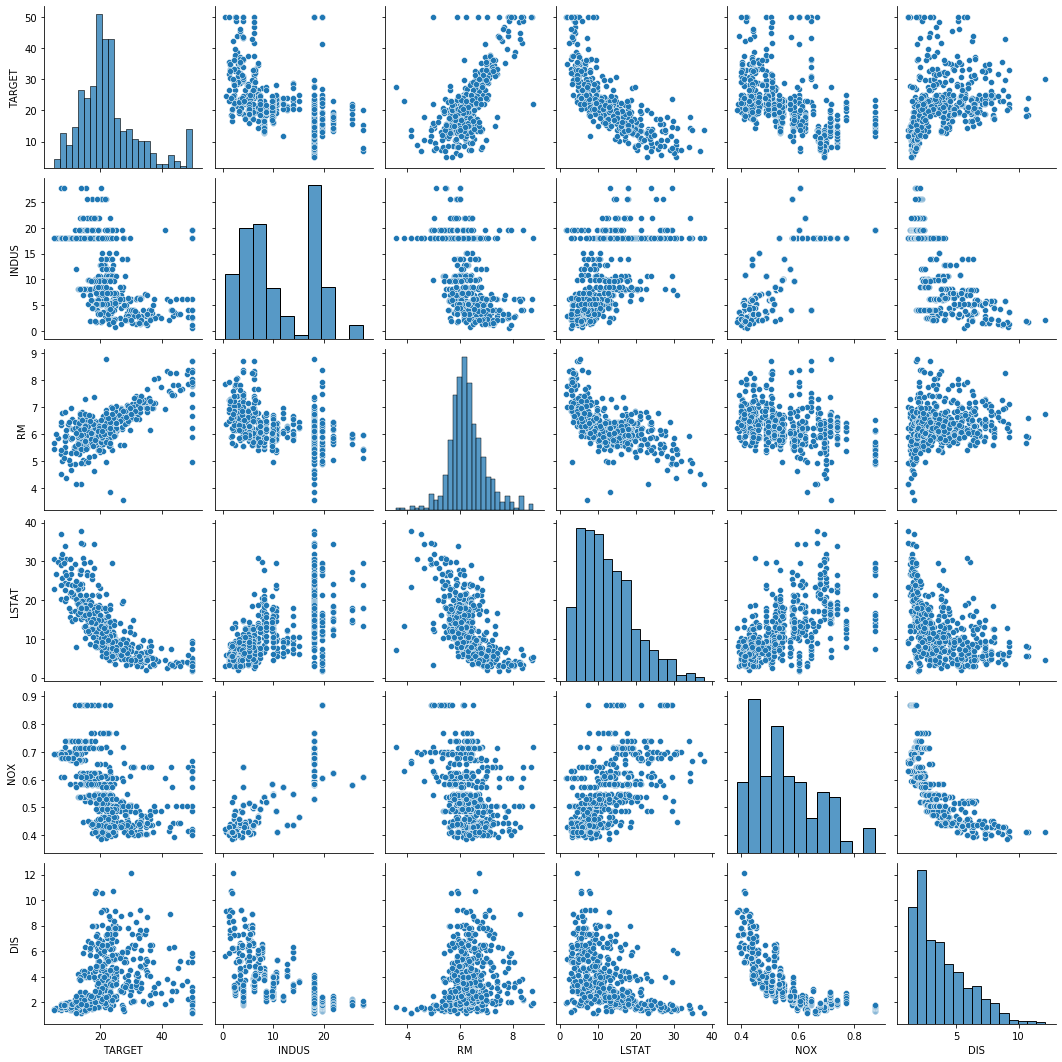

In [8]:
sns.pairplot(df[cols])
plt.show()

## Train Linear Model with PyTorch

In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

In [9]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([506, 6])

In [14]:
data[:5]

tensor([[24.0000,  2.3100,  6.5750,  4.9800,  0.5380,  4.0900],
        [21.6000,  7.0700,  6.4210,  9.1400,  0.4690,  4.9671],
        [34.7000,  7.0700,  7.1850,  4.0300,  0.4690,  4.9671],
        [33.4000,  2.1800,  6.9980,  2.9400,  0.4580,  6.0622],
        [36.2000,  2.1800,  7.1470,  5.3300,  0.4580,  6.0622]])

In [15]:
# Split x and y.
y = data[:, :1]
x = data[:, 1:]

print(x.shape, y.shape)

torch.Size([506, 5]) torch.Size([506, 1])


In [16]:
# Define configurations.
n_epochs = 1000 # 1000번 반복
learning_rate = 1e-3
print_interval = 100 # 100번에 1번씩 print

In [17]:
# Define model.
model = nn.Linear(x.size(-1), y.size(-1))

model

Linear(in_features=5, out_features=1, bias=True)

In [19]:
# Instead of implement gradient equation,
# we can use <optim class> to update model parameters, automatically.
optimizer = optim.SGD(model.parameters(),
                      lr=learning_rate)
# SGD(Stochastic Gradient Descent)

In [20]:
# Whole training samples are used in 1 epoch.
# Thus, "N epochs" means that model saw a sample N-times.
for i in range(n_epochs):
    y_hat = model(x)
    loss = F.mse_loss(y_hat, y)
    
    optimizer.zero_grad()
    loss.backward()
    
    optimizer.step() # 한걸음 진행
    
    if (i + 1) % print_interval == 0:
        print('Epoch %d: loss=%.4e' % (i + 1, loss))

Epoch 100: loss=4.4795e+01
Epoch 200: loss=3.7817e+01
Epoch 300: loss=3.3959e+01
Epoch 400: loss=3.1785e+01
Epoch 500: loss=3.0560e+01
Epoch 600: loss=2.9869e+01
Epoch 700: loss=2.9479e+01
Epoch 800: loss=2.9259e+01
Epoch 900: loss=2.9135e+01
Epoch 1000: loss=2.9064e+01


## Let's see the result!

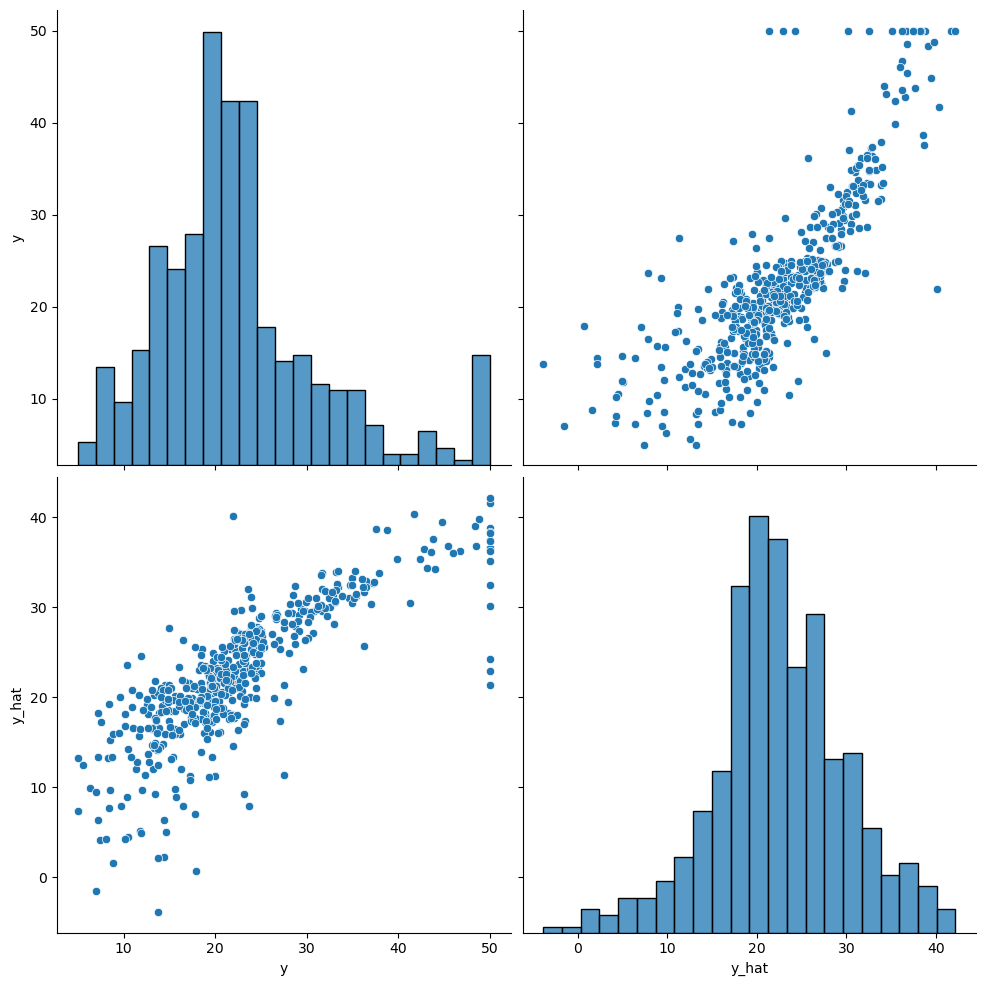

In [21]:
df = pd.DataFrame(torch.cat([y, y_hat], dim=1).detach_().numpy(),
                  columns=["y", "y_hat"])
# concat[(506,1), (506,1), dim=1] => (506,2)
sns.pairplot(df, height=5)
plt.show()